In [1]:
import pandas as pd
from textblob import TextBlob
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
df = pd.read_csv('DB1FBQBtwZM_Comment_pro_veb.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               285 non-null    object 
 1   username         248 non-null    object 
 2   owner_id         248 non-null    float64
 3   profile_pic_url  248 non-null    object 
 4   text             242 non-null    object 
 5   created_at       248 non-null    float64
dtypes: float64(2), object(4)
memory usage: 13.5+ KB


In [5]:
def translate_to_english(text):
    try:
        translation = GoogleTranslator(source='auto', target='en').translate(text)
        return translation if translation else "Translation Error"
    except Exception as e:
        return "Translation Error"

df['Translated'] = df['text'].apply(translate_to_english)

In [6]:
def get_sentiment(text):
    if text == "Translation Error":
        return "Нейтральный"
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Позитивный'
    elif blob.sentiment.polarity < 0:
        return 'Негативный'
    else:
        return 'Нейтральный'

df['Sentiment'] = df['Translated'].apply(get_sentiment)


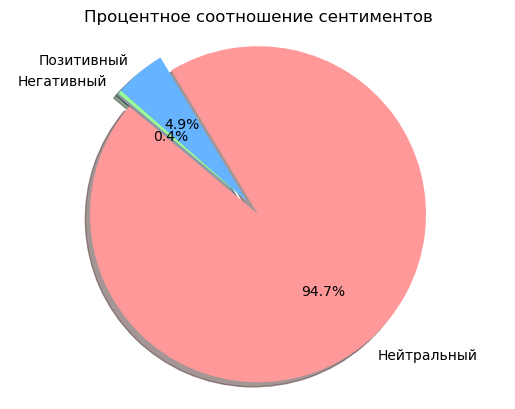

In [8]:
sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Процентное соотношение сентиментов')
plt.show()